<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

<h2>Zadanie 2.</h2>

<h3>Aproksymacja ciągła $f(x) = \sqrt{x}$ na przedziale $[0;2]$</h3>

Dokonamy aproksymacji średniokwadratowej ciągłej na funkcj $f$ wielomianem 2. stopnia, używając wielomianów Czebyszewa

<h4>Definicja funkcji</h4>

In [2]:
# define f
def f(x):
    return np.sqrt(x)

<h4>Definicja wielomianów Czebyszewa</h4>

In [3]:
# define Chebyshev polynomials
# shift x by -1, to change the [0;2] range to [-1;1]
T = [
    lambda x: 1,
    lambda x: x-1,
    lambda x: 2 * (x-1)**2 - 1
]

<h4>Definicja funkcji wagowej</h4>

In [4]:
# weight funcion
# shift x by -1, to change the [0;2] range to [-1;1]
def weight(x):
    return (1 - (x-1)**2)**(-1/2)

<h4>Definicja funkcji obliczających iloczyny skalarne</h4>

In [5]:
# dot product of Chebyshev polynomials of same degree
def dot_product_chebyshev(degree):
    if degree == 0:
        return np.pi
    return np.pi / 2

# integral dot product
def dot_product(range_start, range_end, w, f, g):
    return sp.integrate.quad(lambda x: w(x) * f(x) * g(x), range_start, range_end)

<h4>Aproksymacja wielomianem 2. stopnia</h4>

In [6]:
# calculate the coefficients for the polynomial
coefficients = [dot_product(0, 2, weight, f, T[k])[0] / dot_product_chebyshev(k) for k in [0,1,2]]
# define the polynomial
poly = lambda x: sum(coefficients[k] * T[k](x) for k in [0,1,2])

<h4>Narysowanie otrzymanego wielomianu</h4>

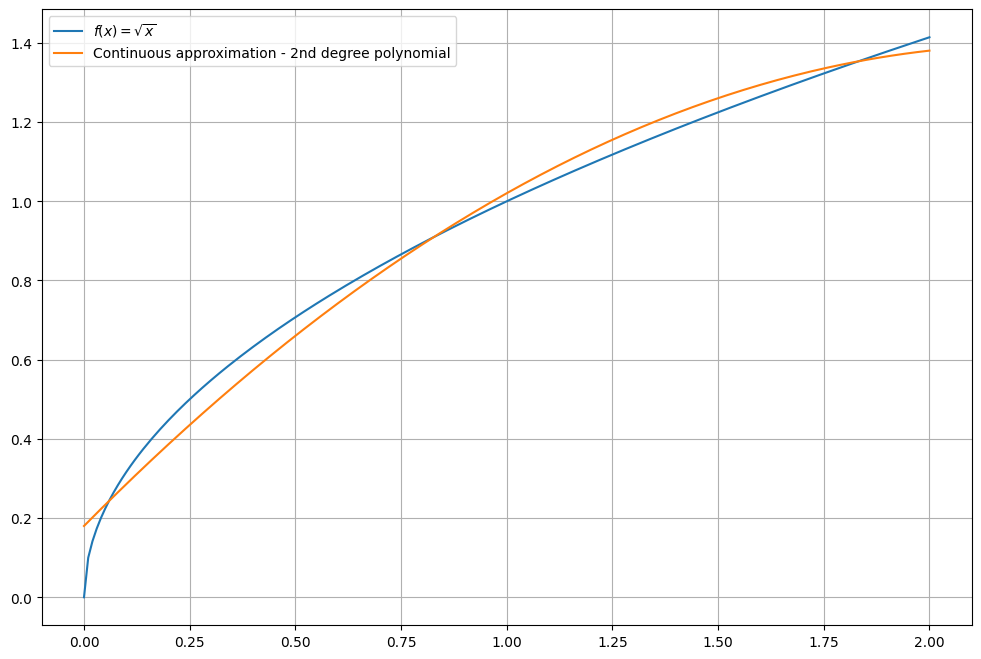

In [7]:
# set figsize
plt.figure(figsize = (12,8))
# plot f and polynomial approximation
xs = np.arange(0, 2.0001, 0.01)
plt.plot(xs, f(xs), label=r"$f(x) = \sqrt{x}$")
plt.plot(xs, poly(xs), label="Continuous approximation - 2nd degree polynomial")
# show plot with grid and legend
plt.grid()
plt.legend()
plt.show()

<h4>Względny błąd aproksymacji</h4>

In [8]:
# define function of error as the integrand
error_integrand = lambda x: np.abs(f(x) - poly(x))

# print out the error integral
print(f"Relative error: {"{:.4f}".format(sp.integrate.quad(error_integrand, 0, 2)[0])}")

Relative error: 0.0628
